In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Coursera_reviews.csv')

In [3]:
data.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [4]:
data = data.drop(columns=['reviewers', 'date_reviews', 'course_id'])

In [5]:
data.head()

,reviews,rating
0,"Pretty dry, but I was able to pass with just t...",4
1,would be a better experience if the video and ...,4
2,Information was perfect! The program itself wa...,4
3,A few grammatical mistakes on test made me do ...,4
4,Excellent course and the training provided was...,4


Number of rows per star rating:
5    1146164
4     226702
3      48303
1      17354
2      16188
Name: rating, dtype: int64


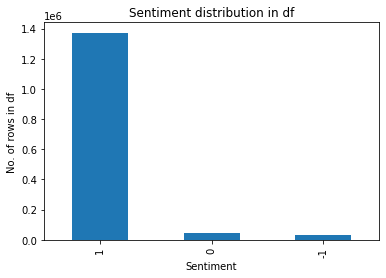

In [6]:
print("Number of rows per star rating:")
print(data['rating'].value_counts())

# Function to map stars to sentiment
def map_sentiment(stars_received):
    if stars_received <= 2:
        return -1
    elif stars_received == 3:
        return 0
    else:
        return 1
# Mapping stars to sentiment into three categories
data['sentiment'] = [ map_sentiment(x) for x in data['rating']]
# Plotting the sentiment distribution
plt.figure()
pd.value_counts(data['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

In [7]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data[(data['sentiment']==1)] 
df_minority = data[(data['sentiment']!=1)] 
# upsample minority class
df_majority_dwnsampled = resample(df_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 81845, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_dwnsampled = pd.concat([df_majority_dwnsampled, df_minority])

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [8]:
data = df_dwnsampled

Number of rows per star rating:
5    68267
3    48303
1    17354
2    16188
4    13578
Name: rating, dtype: int64


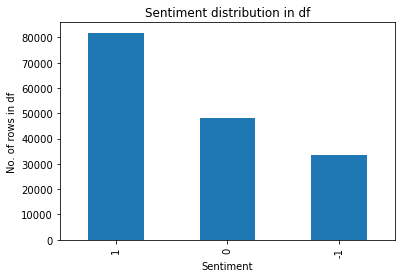

In [9]:
print("Number of rows per star rating:")
print(data['rating'].value_counts())

# Function to map stars to sentiment
def map_sentiment(stars_received):
    if stars_received <= 2:
        return -1
    elif stars_received == 3:
        return 0
    else:
        return 1
# Mapping stars to sentiment into three categories
data['sentiment'] = [ map_sentiment(x) for x in data['rating']]
# Plotting the sentiment distribution
plt.figure()
pd.value_counts(data['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

In [10]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163690 entries, 127608 to 1454301
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   reviews    163659 non-null  object
 1   rating     163690 non-null  int64 
 2   sentiment  163690 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.0+ MB


In [12]:
data = data.dropna()

In [13]:
from gensim.utils import simple_preprocess
# Tokenize the text column to get the new column 'tokenized_text'
data['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in data['reviews']] 
print(data['tokenized_text'].head(10))

127608     [thank, you, so, for, this, wonderful, course,...
709817                    [love, all, the, tutors, in, this]
137582     [excellent, any, satisfying, course, for, lear...
269555                                  [excellent, content]
115918     [everything, is, awesome, thank, you, andrew, ...
774495                                       [great, course]
1170438    [solid, package, for, an, introductory, course...
142987     [it, is, great, course, to, understand, the, n...
1059950    [excelente, muy, practico, muy, claro, con, lo...
1204116                                   [excelente, curso]
Name: tokenized_text, dtype: object


<ipython-input-13-edb4c0763a1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in data['reviews']]


In [14]:
data.head()

,reviews,rating,sentiment,tokenized_text
127608,Thank you so for this wonderful course. Thank ...,5,1,"[thank, you, so, for, this, wonderful, course,..."
709817,Love all the tutors in this,5,1,"[love, all, the, tutors, in, this]"
137582,Excellent any satisfying course for learning d...,5,1,"[excellent, any, satisfying, course, for, lear..."
269555,Excellent content,4,1,"[excellent, content]"
115918,Everything is awesome. Thank you Andrew sir. A...,4,1,"[everything, is, awesome, thank, you, andrew, ..."


In [15]:
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# Get the stemmed_tokens
data['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in data['tokenized_text'] ]
data['stemmed_tokens'].head(10)

<ipython-input-15-b166d16a8b1c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in data['tokenized_text'] ]


127608     [thank, you, so, for, thi, wonder, cours, than...
709817                      [love, all, the, tutor, in, thi]
137582     [excel, ani, satisfi, cours, for, learn, deep,...
269555                                      [excel, content]
115918     [everyth, is, awesom, thank, you, andrew, sir,...
774495                                        [great, cours]
1170438    [solid, packag, for, an, introductori, cours, ...
142987     [it, is, great, cours, to, understand, the, ne...
1059950    [excelent, mui, practico, mui, claro, con, lo,...
1204116                                    [excelent, curso]
Name: stemmed_tokens, dtype: object

In [16]:
data.head()

,reviews,rating,sentiment,tokenized_text,stemmed_tokens
127608,Thank you so for this wonderful course. Thank ...,5,1,"[thank, you, so, for, this, wonderful, course,...","[thank, you, so, for, thi, wonder, cours, than..."
709817,Love all the tutors in this,5,1,"[love, all, the, tutors, in, this]","[love, all, the, tutor, in, thi]"
137582,Excellent any satisfying course for learning d...,5,1,"[excellent, any, satisfying, course, for, lear...","[excel, ani, satisfi, cours, for, learn, deep,..."
269555,Excellent content,4,1,"[excellent, content]","[excel, content]"
115918,Everything is awesome. Thank you Andrew sir. A...,4,1,"[everything, is, awesome, thank, you, andrew, ...","[everyth, is, awesom, thank, you, andrew, sir,..."


In [17]:
data['sentiment'].unique()

array([ 1, -1,  0], dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split
# Train Test Split Function
def split_train_test(data, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(data[['reviews', 'tokenized_text', 'stemmed_tokens']], 
                                                        data['sentiment'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(data)

Value counts for Train sentiments
 1    57245
 0    33816
-1    23500
Name: sentiment, dtype: int64
Value counts for Test sentiments
 1    24587
 0    14476
-1    10035
Name: sentiment, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
     index                                            reviews  \
0     6282        Very relevant content and great instructor!   
1   169288  Learned a lot on improving my negotiations ski...   
2   789623  It was a decent introduction to R programming ...   
3  1236375  the whole lecture given by the lecturer is so ...   
4   332403  Thank you so much mam for this beautiful and i...   

                                      tokenized_text  \
0  [very, relevant, content, and, great, instructor]   
1  [learned, lot, on, improving, my, negotiations...   
2  [it, was, decent, introduction, to, programmin...   
3  [the, whole, lecture, given, by, the, lecturer...   
4  [thank, you, so, much, mam, for, this, beautif...   


In [19]:
OUTPUT_FOLDER = './'

In [ ]:
# from gensim.models import Word2Vec
# import time
# # Skip-gram model (sg = 1)
# size = 1000
# window = 3
# min_count = 1
# workers = 3
# sg = 1

# word2vec_model_file = OUTPUT_FOLDER + 'word2vec_' + str(size) + '.model'
# start_time = time.time()
# stemmed_tokens = pd.Series(data['stemmed_tokens']).values
# # Train the Word2Vec Model
# w2v_model = Word2Vec(stemmed_tokens, min_count = min_count, size = size, workers = workers, window = window, sg = sg)
# print("Time taken to train word2vec model: " + str(time.time() - start_time))
# w2v_model.save(word2vec_model_file)


Exception in thread Thread-7:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
Exception in thread Thread-8:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\HP\anaconda3\lib\threading.py", line 870, in run
    self.run()
  File "C:\Users\HP\anaconda3\lib\threading.py", line 870, in run
    self.run()
  File "C:\Users\HP\anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\gensim\models\base_any2vec.py", line 211, in _worker_loop
    self._target(*self._args, **self._kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\gensim\models\base_any2vec.py", line 211, in _worker_loop
    tally, raw_tally 

In [ ]:
import numpy as np
# Load the model from the model file
sg_w2v_model = Word2Vec.load(word2vec_model_file)
# Unique ID of the word
# print("Index of the word 'action':")
# # print(sg_w2v_model.wv.vocab["action"].index_to_key)
# # Total number of the words 
# # print(len(sg_w2v_model.wv.vocab))
# # Print the size of the word2vec vector for one word
# print("Length of the vector generated for a word")
# # print(len(sg_w2v_model['action']))
# # Get the mean for the vectors for an example review
# print("Print the length after taking average of all word vectors in a sentence:")
# # print(np.mean([sg_w2v_model[token] for token in data['stemmed_tokens'][0]], axis=0))


In [ ]:
word2vec_filename = OUTPUT_FOLDER + 'train_review_word2vec.csv'
with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in X_train.iterrows():
        model_vector = (np.mean([sg_w2v_model.wv[token] for token in row['stemmed_tokens']], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')

In [ ]:
# import time
# #Import the DecisionTreeeClassifier
# from sklearn.tree import DecisionTreeClassifier
# # Load from the filename
# word2vec_df = pd.read_csv(word2vec_filename)
# #Initialize the model
# clf_decision_word2vec = DecisionTreeClassifier()

# start_time = time.time()
# # Fit the model
# clf_decision_word2vec.fit(word2vec_df, Y_train['sentiment'])
# print("Time taken to fit the model with word2vec vectors: " + str(time.time() - start_time))

In [ ]:
# from sklearn.metrics import classification_report
# test_features_word2vec = []
# for index, row in X_test.iterrows():
#     model_vector = np.mean([sg_w2v_model.wv[token] for token in row['stemmed_tokens']], axis=0)
#     if type(model_vector) is list:
#         test_features_word2vec.append(model_vector)
#     else:
#         test_features_word2vec.append(np.array([0 for i in range(1000)]))
# test_predictions_word2vec = clf_decision_word2vec.predict(test_features_word2vec)
# print(classification_report(Y_test['sentiment'],test_predictions_word2vec))